In [1]:
#by Henry Schumacher
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
import time
start_setup = time.process_time_ns()
print('---------------------------------------')
print(time.strftime("vspcReadout.py started: %a, %d %b %Y %H:%M:%S", time.localtime()))
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
import os
import sys
import json
import uuid
import h5py
import math
import xraydb
import plotly
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
import numpy as np
import pandas as pd
# import pyxray as xy
import odrpack as odr
import seaborn as sb
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.gridspec import GridSpec
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from getmac import get_mac_address as gma
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea, VPacker

#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
from colors import load_colors

#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#

from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],
    "text.usetex": True,
    "font.size": 8,
    "pgf.rcfonts": False
})


plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": "\n".join([
          r'\usepackage{amsmath}',
     ]),
})

#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#
color_schemes = load_colors()
color_set = color_schemes['c_rainbow']

end_setup = time.process_time_ns()
elapsed_setup = (end_setup - start_setup)/1e6

print(f'INFO: SETUP COMPLETE ({elapsed_setup:.2f} ms)')
print('---------------------------------------')
#-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-o-#

---------------------------------------
vspcReadout.py started: Fri, 27 Feb 2026 09:41:39
INFO: SETUP COMPLETE (3750.00 ms)
---------------------------------------


In [2]:
def read_json_formatted_file(filepath, encoding="utf-8"):
    """
    Reads a file whose contents are JSON-formatted, regardless of file extension.

    Parameters:
        filepath (str): Path to the file
        encoding (str): File encoding (default: utf-8)

    Returns:
        dict or list: Parsed JSON content

    Raises:
        ValueError: If the file content is not valid JSON
        OSError: If the file cannot be read
    """
    with open(filepath, "r", encoding=encoding) as f:
        content = f.read()

    try:
        return json.loads(content)
    except json.JSONDecodeError as e:
        raise ValueError(f"File content is not valid JSON: {e}") from e
    
def file_collector(measurement:str):
    file_collection = []
    top_level_path = f'.//{measurement}'
    for file in os.listdir(top_level_path):
        if (file[-5:] == '.vspc'):
            full_path = top_level_path + '//' + file
            file_collection.append(full_path)
    return file_collection

def pixe_single_spectrum_plot(filename:str):
    data = read_json_formatted_file(filename)
    energyPerBin = data['Calibration']['BinSize_keV/Bin'] # keV/bin
    bin_data = data['RawData'][:-1] #remove that overflow bin at position 8191
    # print(bin_data)
    bins = np.arange(0,len(bin_data),1)*energyPerBin
    
    scatter_color = color_schemes['c_dark']
    
    fig, ax = plt.subplots(figsize=(6,3), dpi=300)
    # ax.set_facecolor(color_schemes['c_back'])
    # ax.plot(bins, bin_data, lw=0.75, color=scatter_color[0], zorder=2)
    ax.step(bins, bin_data, lw=0.75, color=scatter_color[0], zorder=2)
    
    plt.grid(which="both")
    plt.tight_layout()
    plt.show()

def all_files_from_measSet(m_name:str):
    f_c = file_collector(m_name)
    for file in f_c:
        pixe_single_spectrum_plot(file)
    return 4

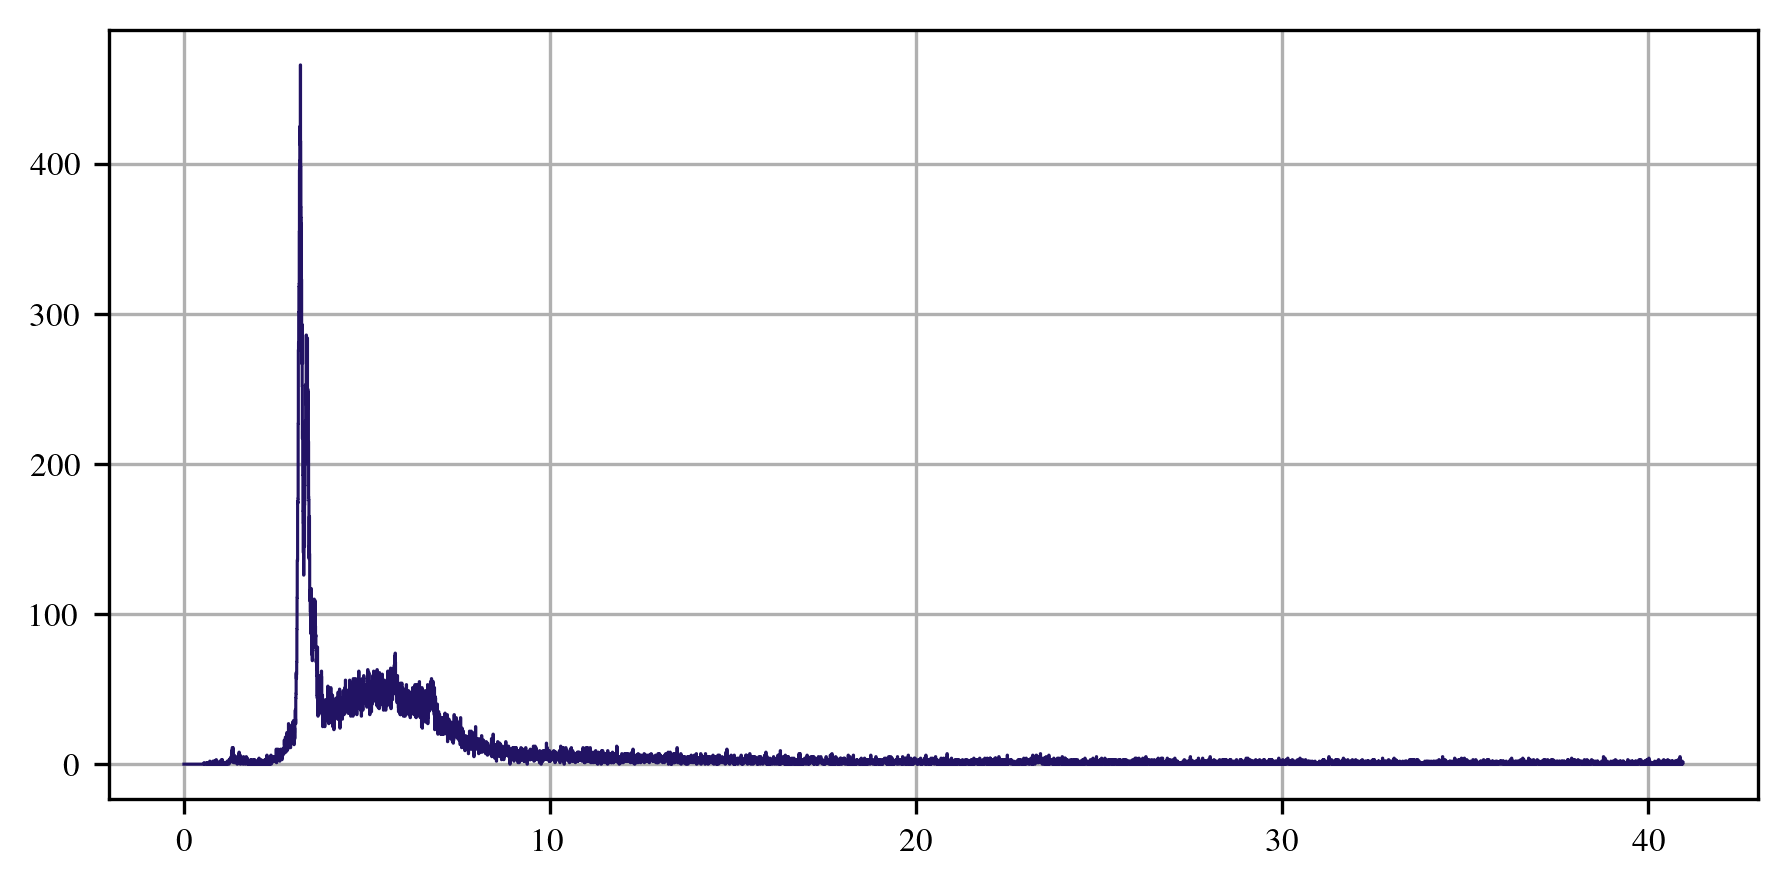

In [14]:
pixe_single_spectrum_plot('.//2026_02_26//20260226-155629.vspc')

## To-Do:

#### Energy Calibration with Amersham Source Data

#### Upload to Confluence: Docu for Detector